In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm  ##OLS REGRESSION

In [22]:
data=pd.read_csv("datasets_10624_14867_Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0


In [23]:
#checking the null data
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [24]:
#salary prediction using LINIEAR REGRESSION
X=data['YearsExperience']
Y=data['Salary']

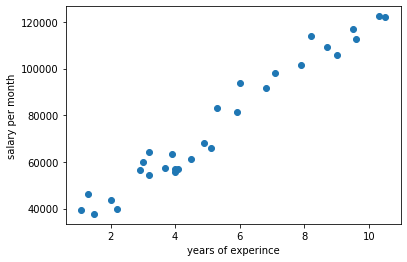

In [25]:
plt.scatter(X,Y)

plt.xlabel('years of experince')
plt.ylabel('salary per month')

plt.show()

In [26]:
#OLS REGRESSION RESULT
X1=sm.add_constant(X)

results=sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    2.56e-24
Time:                        12:07:23   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
#split the data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=40)

In [32]:
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
#FITTING THE MODEL

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#PREDICTING THE SALARY FOR THE TEST VALUES

y_pred=lr.predict(X_test)

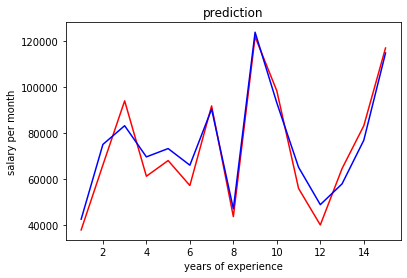

In [38]:
#PLOTTING THE ACTUAL AND TEST VALUES

P=[i for i in range(1,len(y_test)+1,1)]

plt.plot(P,y_test,c='r',linestyle='-')
plt.plot(P,y_pred,c='b',linestyle='-')

plt.xlabel("years of experience")
plt.ylabel('salary per month')
plt.title('prediction')

plt.show()



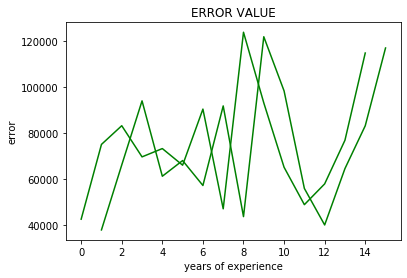

In [42]:
#PLOTTING THE ERRORS

P=[i for i in range(1,len(y_test)+1,1)]

plt.plot(P,y_test,y_pred,c='g',linestyle='-')
plt.xlabel('years of experience')
plt.ylabel('error')
plt.title('ERROR VALUE')

plt.show()



In [44]:
##ACCURACY RESULT
result=lr.score(X_test,y_test)
print('Accuracy : ' ,(result*100))

Accuracy :  93.00581021295928


In [45]:
##IMPORT METRICS FOR EVALUATION OF THE MODEL
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
##CALCULATING R2_SCORE
rsq=r2_score(y_test,y_pred)
rsq

0.9300581021295926

In [50]:
##CALCULATING MEAN_SQUARED_ERROR
mse=mean_squared_error(y_test,y_pred)
mse

46150594.23020594

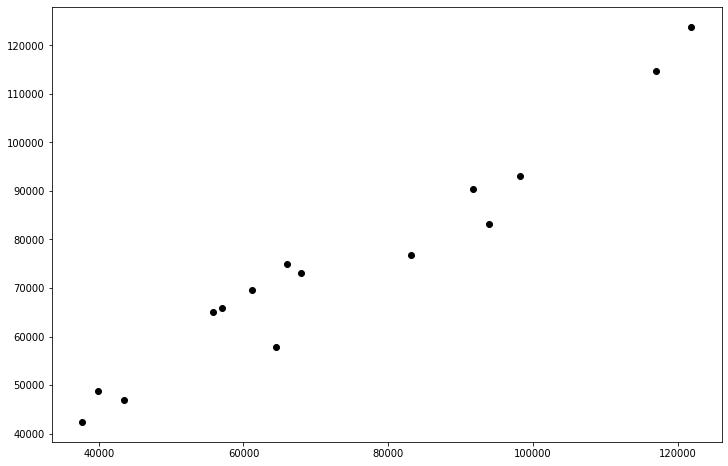

In [53]:
##JUST PLOT ACTUAL AND PREDICTED VALUES
plt.figure(figsize=(12,8))

plt.scatter(y_test,y_pred,c='black',linestyle='-')
plt.show()

In [55]:
##INTERCEPT AND CO_EFFICIENT OF THE MODEL
print('intercept of the model:',lr.intercept_)
                                                 ## Y = C+mX C=intercept m=coefficient
print('coefficient of the model:',lr.coef_)

intercept of the model: 28829.883679072314
coefficient of the model: [9047.36088046]


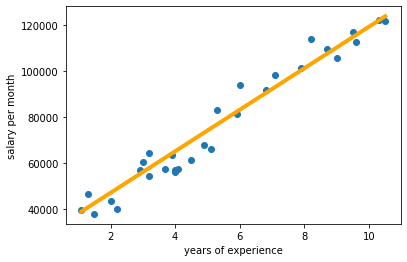

In [56]:
##MODEL VISUALIZATION
plt.scatter(X,Y)
yhat=28829.883679072314+X*9047.36088046
 
 

fig=plt.plot(X,yhat,lw=4,c='orange',label='Regression Line')

plt.xlabel("years of experience")
plt.ylabel('salary per month')

plt.show()